## Data exploration and pre-processing
Basically, for any data analysis or machine learning project the following has to be conducted
- Data gtahering 
- Data assessing 
- Data ceaning 

## Data gathering has been allready done

## Data assessing 
- Assessing is the second and it is assessed to inspect data for two things:
 - **Data quality issues**: Data that has quality issues have issues with content like missing, duplicate, or incorrect data. 
 - **Lack of tidiness**: Data that has specific structural issues

You can search for these issues in two ways:
- Visually by scrolling
- Programmatically using code

for this project I used programmatic Assessment using the following methods 
- .head (DataFrame and Series)
- .tail (DataFrame and Series)
- .sample (DataFrame and Series)
- .info (DataFrame only)
- .describe (DataFrame and Series)
- and other

### some methods associated with quality issue
- .value_counts 
- .duplicates 
- .sort_values 
- sum of .isnull 

In [9]:
# loding liberaries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [36]:
df = pd.read_csv('cleaned_twitterData_data.csv')

In [21]:
df.head(2)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,-0.125,en,4,2,i_ameztoy,20497,2621,NaN,City,i_ameztoy,NaN
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,0.100000,-0.100,en,691,201,ZIisq,65,272,NaN,"China, Taiwan",IndoPac_Info,NaN


In [22]:
# shape info
df.shape

(21997, 15)

In [5]:
# checking against null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          21997 non-null  object 
 1   source              21997 non-null  object 
 2   original_text       21997 non-null  object 
 3   subjectivity        21997 non-null  float64
 4   polarity            21997 non-null  float64
 5   lang                21997 non-null  object 
 6   favorite_count      21997 non-null  int64  
 7   retweet_count       21997 non-null  int64  
 8   original_author     21997 non-null  object 
 9   followers_count     21997 non-null  int64  
 10  friends_count       21997 non-null  int64  
 11  possibly_sensitive  6190 non-null   object 
 12  hashtags            19138 non-null  object 
 13  user_mentions       18695 non-null  object 
 14  place               12106 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+

In [23]:
# satitstical information 
df.describe()

,subjectivity,polarity,favorite_count,retweet_count,followers_count,friends_count
count,21997.000000,21997.000000,21997.000000,21997.000000,2.199700e+04,21997.000000
mean,0.283878,0.061334,852.241033,176.768241,1.796985e+04,1563.237305
std,0.290964,0.223716,3106.276392,498.466921,3.030684e+05,4358.923487
min,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,2.000000,2.000000,5.700000e+01,137.000000
50%,0.200000,0.000000,115.000000,38.000000,2.840000e+02,487.000000
75%,0.469048,0.133333,655.000000,187.000000,1.324000e+03,1599.000000
max,1.000000,1.000000,65170.000000,17409.000000,1.449852e+07,208360.000000


In [37]:
# checking null
df.isnull().any().sum()

4

In [38]:
#checking against duplicated observation
df.duplicated().any().sum()

0

In [39]:
## unique value and ther number of appearance in decending orde
df['polarity'].value_counts()

 0.000000    8982
-0.100000     973
 0.133333     782
 0.050000     502
 0.500000     502
             ... 
-0.014773       1
 0.478788       1
 0.059375       1
 0.010000       1
 0.207143       1
Name: polarity, Length: 829, dtype: int64

In [40]:
# number of unique values
df['polarity'].nunique()

829

In [28]:
df['polarity'].sort_values()

15122   -1.0
2909    -1.0
7448    -1.0
15248   -1.0
7920    -1.0
        ... 
21693    1.0
13630    1.0
20442    1.0
20140    1.0
9778     1.0
Name: polarity, Length: 21997, dtype: float64

In [29]:
#cheking source and orginal_text columns
df[['source','original_text']].head(3)

,source,original_text
0,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...
1,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...
2,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a..."


### Result of the assesmement
- Created_at datatype issue
- missing vaues are there
- the source and original text needs to be cleaned

### Cleaning  
it helps as to solve the following 
- duplicate data
- missing data
- inaccurate data
- incomplete data

In [31]:
#df.head(1)

In [41]:
# handling with missing values with drop method
df.dropna(inplace = True)

In [ ]:
#df.head

In [42]:
# checking against missing value
df.isnull().any().sum()

0

In [43]:
# habdling created_at datatype
df['created_at'] =pd.to_datetime(df['created_at'])

In [16]:
#checking datatype
df['created_at'].dtype

datetime64[ns, UTC]

In [17]:
# handling the source and original text needs to be cleaned and creating new column


In [18]:
#Method to find hashtags from tweets


### Visualization 

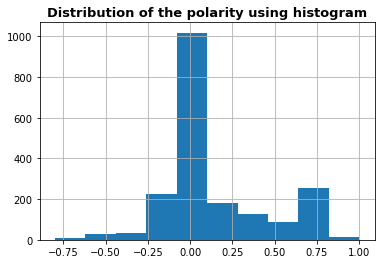

In [19]:
# the plority distribution
df.polarity.hist();
plt.title("Distribution of the polarity using histogram", fontsize = 13, fontweight = 'bold');

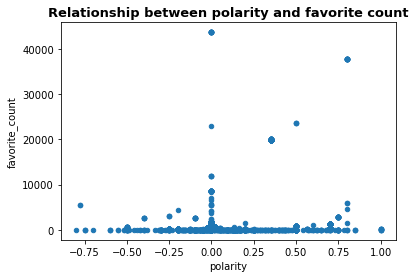

In [20]:
# polarity vs favorite_count using scatter plot
df.plot(x = 'polarity', y = 'favorite_count', kind = 'scatter')
plt.title("Relationship between polarity and favorite count", fontsize = 13, fontweight = 'bold');

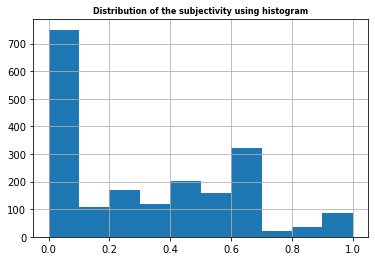

In [21]:
# the distribution of subjectivity
df.subjectivity.hist();
plt.title("Distribution of the subjectivity using histogram", fontsize = 8, fontweight = 'bold');

## Topic Modeling 

In [1]:
# inporting packages 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re
import emoji
import nltk

In [23]:
#data loader class
# class DataLoader:
#   def __init__(self,dir_name,file_name):
#     self.dir_name=dir_name
#     self.file_name = file_name
    
 
#   def read_csv(self):
#     os.chdir(self.dir_name)
#     tweets_df=pd.read_csv(self.file_name)
#     return tweets_df

In [24]:
#object creation
#DataLoader_obj= df

In [44]:
df.head(1)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.5,0.2,en,116,36,GraceCh15554845,207,54,False,Taiwan,benedictrogers,"Melbourne, Victoria"


In [47]:
df['clean_text'] = df['original_text']

In [48]:
df.head(1)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.5,0.2,en,116,36,GraceCh15554845,207,54,False,Taiwan,benedictrogers,"Melbourne, Victoria",RT @benedictrogers: We must not let this happe...


In [49]:
tweets_df = df
#tweets_df

In [61]:
nltk.download('words')
words = set(nltk.corpus.words.words())

In [52]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text

    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet


tweets_df['clean_text'] = tweets_df['original_text'].map(lambda x: cleaner(x))
tweets_df['clean_text']

5        : We must not let this happen . We must be rea...
36              : Roger it as it is . is a part of China !
39       : " For too long , been , and isolated from th...
43       : 🇬🇷 Summer Travel Excursion 👉 check availabil...
48       : We must not let this happen . We must be rea...
                               ...                        
21978    : Head of ' s missile is found dead in hotel ....
21986    Minister is crystal clear in his interview . '...
21987                 : Live - fire military in the with .
21989    : Head of ' s missile is found dead in hotel ....
21993     : A good of China ' s missile on on August 4th .
Name: clean_text, Length: 1976, dtype: object

In [89]:
class PrepareData:
  def __init__(self,df):
    self.df=df
  def preprocess_data(self):
    
    tweets_df = self.df.loc[self.df['lang'] =="en"]

    #print(tweets_df)
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]


    return word_list, word_to_id, corpus_1

In [90]:
PrepareData_obj=PrepareData(tweets_df)
#tweets_df['clean_text']
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [84]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [92]:
#print(id_words)

## Topic Modeling using Latent Dirichlet Allocation
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined.

The purpose of LDA is mapping each teweets in our corpus to a set of topics which covers a good deal of the words in the tweet

In [104]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [105]:
pprint(lda_model.print_topics())

[(0,
  '0.069*"the" + 0.033*"in" + 0.029*"s" + 0.028*"’" + 0.027*"to" + 0.026*"and" '
  '+ 0.025*"of" + 0.020*"china" + 0.015*"with" + 0.015*"is"'),
 (1,
  '0.079*"china" + 0.074*"today" + 0.074*"new" + 0.070*"got" + 0.069*"1" + '
  '0.067*"billion" + 0.067*"4" + 0.066*"pink" + 0.066*"panda" + 0.015*"more"'),
 (2,
  '0.054*"china" + 0.025*"the" + 0.021*"us" + 0.021*"of" + 0.019*"need" + '
  '0.018*"via" + 0.016*"trump" + 0.016*"on" + 0.016*"in" + 0.016*"no"'),
 (3,
  '0.044*"…" + 0.035*"the" + 0.025*"in" + 0.023*"and" + 0.021*"of" + '
  '0.015*"on" + 0.015*"live" + 0.014*"travel" + 0.014*"summer" + 0.012*"from"'),
 (4,
  '0.023*"the" + 0.023*"by" + 0.022*"we" + 0.022*"must" + 0.019*"is" + '
  '0.018*"not" + 0.018*"this" + 0.017*"in" + 0.016*"president" + 0.014*"be"'),
 (5,
  '0.043*"a" + 0.040*"is" + 0.033*"the" + 0.031*"to" + 0.029*"china" + '
  '0.029*"of" + 0.026*"s" + 0.024*"and" + 0.021*"in" + 0.016*"it"')]


In [106]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('the', 0.06875957),
   ('in', 0.032998472),
   ('s', 0.029072074),
   ('’', 0.028167533),
   ('to', 0.02669851),
   ('and', 0.02565651),
   ('of', 0.024649274),
   ('china', 0.020214928),
   ('with', 0.01543836),
   ('is', 0.015215967)]),
 (1,
  [('china', 0.07860394),
   ('today', 0.07390391),
   ('new', 0.0736455),
   ('got', 0.069705024),
   ('1', 0.068664305),
   ('billion', 0.06722328),
   ('4', 0.067221485),
   ('pink', 0.06578026),
   ('panda', 0.065780245),
   ('more', 0.015036244)]),
 (2,
  [('china', 0.05417503),
   ('the', 0.024906538),
   ('us', 0.020820368),
   ('of', 0.020782206),
   ('need', 0.019035963),
   ('via', 0.017572034),
   ('trump', 0.016209632),
   ('on', 0.016173262),
   ('in', 0.015983753),
   ('no', 0.015856285)]),
 (3,
  [('…', 0.04377534),
   ('the', 0.034773704),
   ('in', 0.02527311),
   ('and', 0.022779996),
   ('of', 0.02116417),
   ('on', 0.015224999),
   ('live', 0.015061422),
   ('travel', 0.014408943),
   ('summer', 0.01440879),
   ('from

#### Model Analysis
- Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

- A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [37]:
# # Compute Perplexity

# #It's a measure of how good the model is. The lower the better. Perplexity is a negative value
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# doc_lda = lda_model[corpus]

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)

Anlayizing results Exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [103]:
# importing the gensim_models
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.091180  0.061431       1        1  30.252126
2      0.016530  0.032801       2        1  18.363628
5      0.066367  0.128735       3        1  15.423727
1     -0.298827 -0.015642       4        1  14.211857
3      0.095106 -0.201880       5        1  13.060582
4      0.029644 -0.005445       6        1   8.688080, topic_info=        Term       Freq      Total Category  logprob  loglift
93     today  24.000000  24.000000  Default  30.0000  30.0000
161      new  24.000000  24.000000  Default  29.0000  29.0000
160      got  23.000000  23.000000  Default  28.0000  28.0000
159  billion  22.000000  22.000000  Default  27.0000  27.0000
113        4  22.000000  22.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
3        let   1.503263   5.681230   Topic6  -4.8740   1.1137
11     china   2.298602  75.030228   Topic6  -4.4494  -1.0424
131        s   2.020924  35.609763   Topic6  -4.5781  -0.4258
373       my   1.429985   4.819178   Topic6  -4.9240   1.2283
97      will   1.390332   6.443337   Topic6  -4.9521   0.9097

[313 rows x 6 columns], token_table=      Topic      Freq Term
term                      
530       3  0.655403   00
45        2  0.042869    1
45        4  0.943129    1
523       5  0.328976   19
523       6  0.328976   19
...     ...       ...  ...
623       6  0.493995   🇳🇫
453       2  0.674792   🇹🇼
35        5  0.766622    👉
426       6  0.814791    🔗
624       6  0.493995    😢

[360 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 6, 2, 4, 5])

## Sentiment Analysis

In [97]:
# importing 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# adding sentiment columne 

In [42]:
tweets_df.head(1)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.5,0.2,en,116,36,GraceCh15554845,207,54,False,Taiwan,benedictrogers,"Melbourne, Victoria",we must not let this happen we must be ready...


In [72]:
# adding sentiment 
tweets_df.insert(1,column = 'sentiment',value = "")
#tweets_df.insert(4,column = 'sentiment',value = tweets_df[''])

In [78]:
def text_category (polarity):
    if polarity > 0:
        return 'positive'
    if polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [79]:
score= pd.Series([text_category(row_value) for row_value in tweets_df['polarity']])
print("sucees")
tweets_df = pd.concat([tweets_df, score.rename('sentiment')], axis=1)


sucees


In [87]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5494 entries, 5 to 3797
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          1976 non-null   datetime64[ns, UTC]
 1   source              1976 non-null   object             
 2   original_text       1976 non-null   object             
 3   subjectivity        1976 non-null   float64            
 4   polarity            1976 non-null   float64            
 5   lang                1976 non-null   object             
 6   favorite_count      1976 non-null   float64            
 7   retweet_count       1976 non-null   float64            
 8   original_author     1976 non-null   object             
 9   followers_count     1976 non-null   float64            
 10  friends_count       1976 non-null   float64            
 11  possibly_sensitive  1976 non-null   object             
 12  hashtags            1976 non-null 

In [118]:
# droping null value 
tweets_df.dropna(inplace = True)


In [119]:
# Selecting the feature and the label
features = tweets_df.iloc[:, 15].values
labels = tweets_df.iloc[:, 16].values

In [72]:
print(features)

['Melbourne, Victoria' 'Florida, USA' 'Hong Kong' 'Paris' 'Hong Kong'
 'Turin, ITALY' 'London' 'Singapore' 'Singapore' 'SHITHOLE DEMOCRAT CITY'
 'Singapore' 'Barcelona. España ' 'London' 'US' 'United States'
 'Hargeisa- Rep of Somaliland' 'New York, NY' 'North West, England'
 'United Kingdom' 'Pakistan' 'Washington, DC' 'North Carolina, USA '
 'Beijing, China ' 'New York, NY' 'Chicago' 'India' 'United Kingdom'
 'United Kingdom' 'United Kingdom' 'Taipei, Taiwan'
 "Shanghai, People's Republic of China" 'Orwell 1984 '
 ' GuangZhou，Shenzhen, Canada，' 'Karachi, Pakistan' 'London'
 'Ft. Worth, Tx' 'India' 'Canada' 'Saltillo' 'Peshawar, Pakistan'
 'Irvine, CA' 'The Netherlands' 'Sevilla, España' 'Venezuela'
 'Buenos Aires & London' 'Paris' 'Quelque Part' 'Spokane, WA'
 'London, England' 'London, England' 'BLACKO WIASE  - Sad Boys FC🧳'
 'World' 'Hong Kong ' 'www.facebook.com/mariocavolo' 'Journalism/News'
 'san juan' 'Wop wops' 'กรุงเทพมหานคร, ประเทศไทย' 'Berkeley, CA'
 'West Haven, CT' 'Cuper

In [122]:
#Data Cleaning using regular expression
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [70]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ekubay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vectorized = vectorizer.fit_transform(processed_features).toarray()

In [124]:
# split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vectorized, labels, test_size=0.2, random_state=0)

In [126]:
# training 
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [127]:
#prediction
predictions = text_classifier.predict(X_test)

In [128]:
predictions[:10]

array(['neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral'], dtype=object)

In [129]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

0.6140350877192983
